<function matplotlib.pyplot.show(close=None, block=None)>

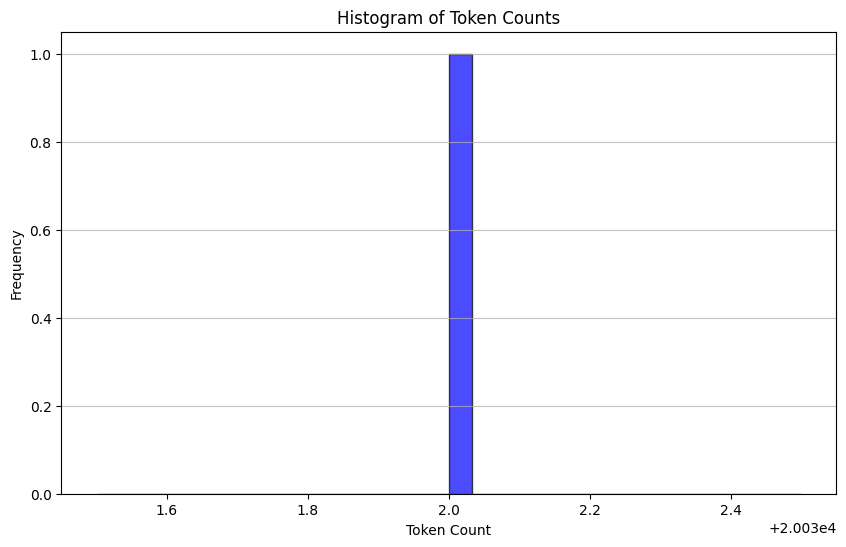

In [1]:
import matplotlib.pyplot as plt
import tiktoken
from bs4 import BeautifulSoup as Soup
from langchain_community.document_loaders.recursive_url_loader import RecursiveUrlLoader


def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens


# DIPY API
url = "https://docs.dipy.org/stable/reference/index.html"
loader = RecursiveUrlLoader(
    url=url, max_depth=10000, extractor=lambda x: Soup(x, "html.parser").text
)
docs = loader.load()

# # DIPY Tutorials
# url = "https://docs.dipy.org/stable/examples_built/"
# loader = RecursiveUrlLoader(
#     url=url, max_depth=10000, extractor=lambda x: Soup(x, "html.parser").text
# )
# docs_tutorials = loader.load()

# # DIPY CLI Workflows
# url = "https://docs.dipy.org/stable/interfaces/"
# loader = RecursiveUrlLoader(
#     url=url, max_depth=10000, extractor=lambda x: Soup(x, "html.parser").text
# )
# docs_workflows = loader.load()

# # DIPY CLI API
# url = "https://docs.dipy.org/stable/reference_cmd/"
# loader = RecursiveUrlLoader(
#     url=url, max_depth=10000, extractor=lambda x: Soup(x, "html.parser").text
# )
# docs_cli_api = loader.load()

# # DIPY Discussions
# url = "https://github.com/dipy/dipy/discussions"
# loader = RecursiveUrlLoader(
#     url=url, max_depth=10000, extractor=lambda x: Soup(x, "html.parser").text
# )
# docs_discuss = loader.load()

# # Doc texts
# docs.extend([*docs_tutorials, *docs_workflows, *docs_cli_api, *docs_discuss])
docs_texts = [d.page_content for d in docs]

# Calculate the number of tokens for each document
counts = [num_tokens_from_string(d, "cl100k_base") for d in docs_texts]

# Plotting the histogram of token counts
plt.figure(figsize=(10, 6))
plt.hist(counts, bins=30, color="blue", edgecolor="black", alpha=0.7)
plt.title("Histogram of Token Counts")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)

# Display the histogram
plt.show

In [2]:
# Doc texts concat
d_sorted = sorted(docs, key=lambda x: x.metadata["source"])
d_reversed = list(reversed(d_sorted))
concatenated_content = "\n\n\n --- \n\n\n".join(
    [doc.page_content for doc in d_reversed]
)
print(
    "Num tokens in all context: %s"
    % num_tokens_from_string(concatenated_content, "cl100k_base")
)

Num tokens in all context: 20032


In [3]:
# Doc texts split
from langchain_text_splitters import RecursiveCharacterTextSplitter

chunk_size_tok = 2000
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=chunk_size_tok, chunk_overlap=0
)
texts_split = text_splitter.split_text(concatenated_content)

In [4]:
len(texts_split)

17

In [6]:
from langchain_community.embeddings import LlamaCppEmbeddings
from langchain_community.llms import LlamaCpp
from langchain.callbacks.manager import CallbackManager
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler

# Nomic v1 or v1.5
embd_model_path = "/home/aajais/Desktop/DiPyCodeAssistant/llama.cpp/models/nomic-embed-text-v1.5.Q5_K_S.gguf"
embd = LlamaCppEmbeddings(model_path=embd_model_path, n_batch=512)

callback_manager = CallbackManager([StreamingStdOutCallbackHandler()])
model = LlamaCpp(
    model_path="/home/aajais/Desktop/DiPyCodeAssistant/model/codellama-13b-instruct.Q4_K_M.gguf",
    n_ctx=5000,
    n_gpu_layers=4,
    n_batch=512,
    f16_kv=True,
    callback_manager=callback_manager,
    verbose=True,
)

llama_model_loader: loaded meta data with 23 key-value pairs and 112 tensors from /home/aajais/Desktop/DiPyCodeAssistant/llama.cpp/models/nomic-embed-text-v1.5.Q5_K_S.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = nomic-bert
llama_model_loader: - kv   1:                               general.name str              = nomic-embed-text-v1.5
llama_model_loader: - kv   2:                     nomic-bert.block_count u32              = 12
llama_model_loader: - kv   3:                  nomic-bert.context_length u32              = 2048
llama_model_loader: - kv   4:                nomic-bert.embedding_length u32              = 768
llama_model_loader: - kv   5:             nomic-bert.feed_forward_length u32              = 3072
llama_model_loader: - kv   6:            nomic-bert.attention.head_count u32              = 12
llama_

llm_load_vocab: mismatch in special tokens definition ( 7104/30522 vs 5/30522 ).
llm_load_print_meta: format           = GGUF V3 (latest)
llm_load_print_meta: arch             = nomic-bert
llm_load_print_meta: vocab type       = WPM
llm_load_print_meta: n_vocab          = 30522
llm_load_print_meta: n_merges         = 0
llm_load_print_meta: n_ctx_train      = 2048
llm_load_print_meta: n_embd           = 768
llm_load_print_meta: n_head           = 12
llm_load_print_meta: n_head_kv        = 12
llm_load_print_meta: n_layer          = 12
llm_load_print_meta: n_rot            = 64
llm_load_print_meta: n_embd_head_k    = 64
llm_load_print_meta: n_embd_head_v    = 64
llm_load_print_meta: n_gqa            = 1
llm_load_print_meta: n_embd_k_gqa     = 768
llm_load_print_meta: n_embd_v_gqa     = 768
llm_load_print_meta: f_norm_eps       = 1.0e-12
llm_load_print_meta: f_norm_rms_eps   = 0.0e+00
llm_load_print_meta: f_clamp_kqv      = 0.0e+00
llm_load_print_meta: f_max_alibi_bias = 0.0e+00
llm_load_p

In [7]:
from typing import Dict, List, Optional, Tuple

import numpy as np
import pandas as pd
import umap
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from sklearn.mixture import GaussianMixture

RANDOM_SEED = 224  # Fixed seed for reproducibility

### --- Code from citations referenced above (added comments and docstrings) --- ###


def global_cluster_embeddings(
    embeddings: np.ndarray,
    dim: int,
    n_neighbors: Optional[int] = None,
    metric: str = "cosine",
) -> np.ndarray:
    """
    Perform global dimensionality reduction on the embeddings using UMAP.

    Parameters:
    - embeddings: The input embeddings as a numpy array.
    - dim: The target dimensionality for the reduced space.
    - n_neighbors: Optional; the number of neighbors to consider for each point.
                   If not provided, it defaults to the square root of the number of embeddings.
    - metric: The distance metric to use for UMAP.

    Returns:
    - A numpy array of the embeddings reduced to the specified dimensionality.
    """
    if n_neighbors is None:
        n_neighbors = int((len(embeddings) - 1) ** 0.5)
    return umap.UMAP(
        n_neighbors=n_neighbors, n_components=dim, metric=metric
    ).fit_transform(embeddings)


def local_cluster_embeddings(
    embeddings: np.ndarray, dim: int, num_neighbors: int = 10, metric: str = "cosine"
) -> np.ndarray:
    """
    Perform local dimensionality reduction on the embeddings using UMAP, typically after global clustering.

    Parameters:
    - embeddings: The input embeddings as a numpy array.
    - dim: The target dimensionality for the reduced space.
    - num_neighbors: The number of neighbors to consider for each point.
    - metric: The distance metric to use for UMAP.

    Returns:
    - A numpy array of the embeddings reduced to the specified dimensionality.
    """
    return umap.UMAP(
        n_neighbors=num_neighbors, n_components=dim, metric=metric
    ).fit_transform(embeddings)


def get_optimal_clusters(
    embeddings: np.ndarray, max_clusters: int = 50, random_state: int = RANDOM_SEED
) -> int:
    """
    Determine the optimal number of clusters using the Bayesian Information Criterion (BIC) with a Gaussian Mixture Model.

    Parameters:
    - embeddings: The input embeddings as a numpy array.
    - max_clusters: The maximum number of clusters to consider.
    - random_state: Seed for reproducibility.

    Returns:
    - An integer representing the optimal number of clusters found.
    """
    max_clusters = min(max_clusters, len(embeddings))
    n_clusters = np.arange(1, max_clusters)
    bics = []
    for n in n_clusters:
        gm = GaussianMixture(n_components=n, random_state=random_state)
        gm.fit(embeddings)
        bics.append(gm.bic(embeddings))
    return n_clusters[np.argmin(bics)]


def GMM_cluster(embeddings: np.ndarray, threshold: float, random_state: int = 0):
    """
    Cluster embeddings using a Gaussian Mixture Model (GMM) based on a probability threshold.

    Parameters:
    - embeddings: The input embeddings as a numpy array.
    - threshold: The probability threshold for assigning an embedding to a cluster.
    - random_state: Seed for reproducibility.

    Returns:
    - A tuple containing the cluster labels and the number of clusters determined.
    """
    n_clusters = get_optimal_clusters(embeddings)
    gm = GaussianMixture(n_components=n_clusters, random_state=random_state)
    gm.fit(embeddings)
    probs = gm.predict_proba(embeddings)
    labels = [np.where(prob > threshold)[0] for prob in probs]
    return labels, n_clusters


def perform_clustering(
    embeddings: np.ndarray,
    dim: int,
    threshold: float,
) -> List[np.ndarray]:
    """
    Perform clustering on the embeddings by first reducing their dimensionality globally, then clustering
    using a Gaussian Mixture Model, and finally performing local clustering within each global cluster.

    Parameters:
    - embeddings: The input embeddings as a numpy array.
    - dim: The target dimensionality for UMAP reduction.
    - threshold: The probability threshold for assigning an embedding to a cluster in GMM.

    Returns:
    - A list of numpy arrays, where each array contains the cluster IDs for each embedding.
    """
    if len(embeddings) <= dim + 1:
        # Avoid clustering when there's insufficient data
        return [np.array([0]) for _ in range(len(embeddings))]

    # Global dimensionality reduction
    reduced_embeddings_global = global_cluster_embeddings(embeddings, dim)
    # Global clustering
    global_clusters, n_global_clusters = GMM_cluster(
        reduced_embeddings_global, threshold
    )

    all_local_clusters = [np.array([]) for _ in range(len(embeddings))]
    total_clusters = 0

    # Iterate through each global cluster to perform local clustering
    for i in range(n_global_clusters):
        # Extract embeddings belonging to the current global cluster
        global_cluster_embeddings_ = embeddings[
            np.array([i in gc for gc in global_clusters])
        ]

        if len(global_cluster_embeddings_) == 0:
            continue
        if len(global_cluster_embeddings_) <= dim + 1:
            # Handle small clusters with direct assignment
            local_clusters = [np.array([0]) for _ in global_cluster_embeddings_]
            n_local_clusters = 1
        else:
            # Local dimensionality reduction and clustering
            reduced_embeddings_local = local_cluster_embeddings(
                global_cluster_embeddings_, dim
            )
            local_clusters, n_local_clusters = GMM_cluster(
                reduced_embeddings_local, threshold
            )

        # Assign local cluster IDs, adjusting for total clusters already processed
        for j in range(n_local_clusters):
            local_cluster_embeddings_ = global_cluster_embeddings_[
                np.array([j in lc for lc in local_clusters])
            ]
            indices = np.where(
                (embeddings == local_cluster_embeddings_[:, None]).all(-1)
            )[1]
            for idx in indices:
                all_local_clusters[idx] = np.append(
                    all_local_clusters[idx], j + total_clusters
                )

        total_clusters += n_local_clusters

    return all_local_clusters


### --- Our code below --- ###


def embed(texts):
    """
    Generate embeddings for a list of text documents.

    This function assumes the existence of an `embd` object with a method `embed_documents`
    that takes a list of texts and returns their embeddings.

    Parameters:
    - texts: List[str], a list of text documents to be embedded.

    Returns:
    - numpy.ndarray: An array of embeddings for the given text documents.
    """
    text_embeddings = embd.embed_documents(texts)
    text_embeddings_np = np.array(text_embeddings)
    return text_embeddings_np


def embed_cluster_texts(texts):
    """
    Embeds a list of texts and clusters them, returning a DataFrame with texts, their embeddings, and cluster labels.

    This function combines embedding generation and clustering into a single step. It assumes the existence
    of a previously defined `perform_clustering` function that performs clustering on the embeddings.

    Parameters:
    - texts: List[str], a list of text documents to be processed.

    Returns:
    - pandas.DataFrame: A DataFrame containing the original texts, their embeddings, and the assigned cluster labels.
    """
    text_embeddings_np = embed(texts)  # Generate embeddings
    cluster_labels = perform_clustering(
        text_embeddings_np, 10, 0.1
    )  # Perform clustering on the embeddings
    df = pd.DataFrame()  # Initialize a DataFrame to store the results
    df["text"] = texts  # Store original texts
    df["embd"] = list(text_embeddings_np)  # Store embeddings as a list in the DataFrame
    df["cluster"] = cluster_labels  # Store cluster labels
    return df


def fmt_txt(df: pd.DataFrame) -> str:
    """
    Formats the text documents in a DataFrame into a single string.

    Parameters:
    - df: DataFrame containing the 'text' column with text documents to format.

    Returns:
    - A single string where all text documents are joined by a specific delimiter.
    """
    unique_txt = df["text"].tolist()
    return "--- --- \n --- --- ".join(unique_txt)


def embed_cluster_summarize_texts(
    texts: List[str], level: int
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Embeds, clusters, and summarizes a list of texts. This function first generates embeddings for the texts,
    clusters them based on similarity, expands the cluster assignments for easier processing, and then summarizes
    the content within each cluster.

    Parameters:
    - texts: A list of text documents to be processed.
    - level: An integer parameter that could define the depth or detail of processing.

    Returns:
    - Tuple containing two DataFrames:
      1. The first DataFrame (`df_clusters`) includes the original texts, their embeddings, and cluster assignments.
      2. The second DataFrame (`df_summary`) contains summaries for each cluster, the specified level of detail,
         and the cluster identifiers.
    """

    # Embed and cluster the texts, resulting in a DataFrame with 'text', 'embd', and 'cluster' columns
    df_clusters = embed_cluster_texts(texts)

    # Prepare to expand the DataFrame for easier manipulation of clusters
    expanded_list = []

    # Expand DataFrame entries to document-cluster pairings for straightforward processing
    for index, row in df_clusters.iterrows():
        for cluster in row["cluster"]:
            expanded_list.append(
                {"text": row["text"], "embd": row["embd"], "cluster": cluster}
            )

    # Create a new DataFrame from the expanded list
    expanded_df = pd.DataFrame(expanded_list)

    # Retrieve unique cluster identifiers for processing
    all_clusters = expanded_df["cluster"].unique()

    print(f"--Generated {len(all_clusters)} clusters--")

    # Summarization
    template = """Here is a sub-set of LangChain Expression Langauge doc. 
    
    LangChain Expression Langauge provides a way to compose chain in LangChain.
    
    Give a detailed summary of the documentation provided.
    
    Documentation:
    {context}
    """
    prompt = ChatPromptTemplate.from_template(template)
    chain = prompt | model | StrOutputParser()

    # Format text within each cluster for summarization
    summaries = []
    for i in all_clusters:
        df_cluster = expanded_df[expanded_df["cluster"] == i]
        formatted_txt = fmt_txt(df_cluster)
        summaries.append(chain.invoke({"context": formatted_txt}))

    # Create a DataFrame to store summaries with their corresponding cluster and level
    df_summary = pd.DataFrame(
        {
            "summaries": summaries,
            "level": [level] * len(summaries),
            "cluster": list(all_clusters),
        }
    )

    return df_clusters, df_summary


def recursive_embed_cluster_summarize(
    texts: List[str], level: int = 1, n_levels: int = 3
) -> Dict[int, Tuple[pd.DataFrame, pd.DataFrame]]:
    """
    Recursively embeds, clusters, and summarizes texts up to a specified level or until
    the number of unique clusters becomes 1, storing the results at each level.

    Parameters:
    - texts: List[str], texts to be processed.
    - level: int, current recursion level (starts at 1).
    - n_levels: int, maximum depth of recursion.

    Returns:
    - Dict[int, Tuple[pd.DataFrame, pd.DataFrame]], a dictionary where keys are the recursion
      levels and values are tuples containing the clusters DataFrame and summaries DataFrame at that level.
    """
    results = {}  # Dictionary to store results at each level

    # Perform embedding, clustering, and summarization for the current level
    df_clusters, df_summary = embed_cluster_summarize_texts(texts, level)

    # Store the results of the current level
    results[level] = (df_clusters, df_summary)

    # Determine if further recursion is possible and meaningful
    unique_clusters = df_summary["cluster"].nunique()
    if level < n_levels and unique_clusters > 1:
        # Use summaries as the input texts for the next level of recursion
        new_texts = df_summary["summaries"].tolist()
        next_level_results = recursive_embed_cluster_summarize(
            new_texts, level + 1, n_levels
        )

        # Merge the results from the next level into the current results dictionary
        results.update(next_level_results)

    return results

/home/aajais/Desktop/DiPyCodeAssistant/llm_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
leaf_texts = docs_texts
results = recursive_embed_cluster_summarize(leaf_texts, level=1, n_levels=3)


llama_print_timings:        load time =    2838.05 ms
llama_print_timings:      sample time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings: prompt eval time =    2667.34 ms /   512 tokens (    5.21 ms per token,   191.95 tokens per second)
llama_print_timings:        eval time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings:       total time =    2854.40 ms /   513 tokens


--Generated 1 clusters--


ValueError: Requested tokens (32085) exceed context window of 5000

# Self-Corrective

In [2]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_mistralai import MistralAIEmbeddings
# from langchain_community.embeddings import GPT4AllEmbeddings
from langchain_community.embeddings import LlamaCppEmbeddings

# Load
url = "https://docs.dipy.org/stable/reference/index"
loader = WebBaseLoader(url)
docs = loader.load()

# Split
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=500, chunk_overlap=100
)
all_splits = text_splitter.split_documents(docs)

# Embed and index
    # GPT4All
    # embedding = GPT4AllEmbeddings()
    # Nomic v1 or v1.5
embd_model_path = "/home/aajais/Desktop/DiPyCodeAssistant/llama.cpp/models/nomic-embed-text-v1.5.Q5_K_S.gguf"
embedding = LlamaCppEmbeddings(model_path=embd_model_path, n_batch=512)

# Index
vectorstore = Chroma.from_documents(
    documents=all_splits,
    collection_name="rag-chroma",
    embedding=embedding,
)
retriever = vectorstore.as_retriever()

llama_model_loader: loaded meta data with 23 key-value pairs and 112 tensors from /home/aajais/Desktop/DiPyCodeAssistant/llama.cpp/models/nomic-embed-text-v1.5.Q5_K_S.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = nomic-bert
llama_model_loader: - kv   1:                               general.name str              = nomic-embed-text-v1.5
llama_model_loader: - kv   2:                     nomic-bert.block_count u32              = 12
llama_model_loader: - kv   3:                  nomic-bert.context_length u32              = 2048
llama_model_loader: - kv   4:                nomic-bert.embedding_length u32              = 768
llama_model_loader: - kv   5:             nomic-bert.feed_forward_length u32              = 3072
llama_model_loader: - kv   6:            nomic-bert.attention.head_count u32              = 12
llama_

In [3]:
from typing import Annotated, Dict, TypedDict

from langchain_core.messages import BaseMessage


class GraphState(TypedDict):
    """
    Represents the state of our graph.

    Attributes:
        keys: A dictionary where each key is a string.
    """

    keys: Dict[str, any]

In [4]:
import json
import operator
from typing import Annotated, Sequence, TypedDict

from langchain import hub
from langchain_core.output_parsers import JsonOutputParser
from langchain.prompts import PromptTemplate
from langchain.schema import Document
from langchain_community.chat_models import ChatOllama
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_community.vectorstores import Chroma
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_mistralai.chat_models import ChatMistralAI

### Nodes ###


def retrieve(state, retriever):
    """
    Retrieve documents

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, documents, that contains retrieved documents
    """
    print("---RETRIEVE---")
    state_dict = state["keys"]
    question = state_dict["question"]
    local = state_dict["local"]
    documents = retriever.get_relevant_documents(question)
    return {"keys": {"documents": documents, "local": local, "question": question}}


def generate(state, llm):
    """
    Generate answer

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, generation, that contains generation
    """
    print("---GENERATE---")
    state_dict = state["keys"]
    question = state_dict["question"]
    documents = state_dict["documents"]
    local = state_dict["local"]

    # Prompt
    prompt = hub.pull("rlm/rag-prompt")

    # Post-processing
    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)

    # Chain
    rag_chain = prompt | llm | StrOutputParser()

    # Run
    generation = rag_chain.invoke({"context": documents, "question": question})
    return {
        "keys": {"documents": documents, "question": question, "generation": generation}
    }


def grade_documents(state, llm):
    """
    Determines whether the retrieved documents are relevant to the question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates documents key with relevant documents
    """

    print("---CHECK RELEVANCE---")
    state_dict = state["keys"]
    question = state_dict["question"]
    documents = state_dict["documents"]
    local = state_dict["local"]

    prompt = PromptTemplate(
        template="""You are a grader assessing relevance of a retrieved document to a user question. \n 
        Here is the retrieved document: \n\n {context} \n\n
        Here is the user question: {question} \n
        If the document contains keywords related to the user question, grade it as relevant. \n
        It does not need to be a stringent test. The goal is to filter out erroneous retrievals. \n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question. \n
        Provide the binary score as a JSON with a single key 'score' and no premable or explaination.""",
        input_variables=["question", "context"],
    )

    chain = prompt | llm | JsonOutputParser()

    # Score
    filtered_docs = []
    search = "No"  # Default do not opt for web search to supplement retrieval
    for d in documents:
        score = chain.invoke(
            {
                "question": question,
                "context": d.page_content,
            }
        )
        grade = score["score"]
        if grade == "yes":
            print("---GRADE: DOCUMENT RELEVANT---")
            filtered_docs.append(d)
        else:
            print("---GRADE: DOCUMENT NOT RELEVANT---")
            search = "Yes"  # Perform web search
            continue

    return {
        "keys": {
            "documents": filtered_docs,
            "question": question,
            "local": local,
            "run_web_search": search,
        }
    }


def transform_query(state, llm):
    """
    Transform the query to produce a better question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates question key with a re-phrased question
    """

    print("---TRANSFORM QUERY---")
    state_dict = state["keys"]
    question = state_dict["question"]
    documents = state_dict["documents"]
    local = state_dict["local"]

    # Create a prompt template with format instructions and the query
    prompt = PromptTemplate(
        template="""You are generating questions that is well optimized for retrieval. \n 
        Look at the input and try to reason about the underlying sematic intent / meaning. \n 
        Here is the initial question:
        \n ------- \n
        {question} 
        \n ------- \n
        Provide an improved question without any premable, only respond with the updated question: """,
        input_variables=["question"],
    )

    # Prompt
    chain = prompt | llm | StrOutputParser()
    better_question = chain.invoke({"question": question})

    return {
        "keys": {"documents": documents, "question": better_question, "local": local}
    }


def web_search(state):
    """
    Web search based on the re-phrased question using Tavily API.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Web results appended to documents.
    """

    print("---WEB SEARCH---")
    state_dict = state["keys"]
    question = state_dict["question"]
    documents = state_dict["documents"]
    local = state_dict["local"]

    tool = TavilySearchResults()
    docs = tool.invoke({"query": question})
    web_results = "\n".join([d["content"] for d in docs])
    web_results = Document(page_content=web_results)
    documents.append(web_results)

    return {"keys": {"documents": documents, "local": local, "question": question}}


### Edges


def decide_to_generate(state):
    """
    Determines whether to generate an answer or re-generate a question for web search.

    Args:
        state (dict): The current state of the agent, including all keys.

    Returns:
        str: Next node to call
    """

    print("---DECIDE TO GENERATE---")
    state_dict = state["keys"]
    question = state_dict["question"]
    filtered_documents = state_dict["documents"]
    search = state_dict["run_web_search"]

    if search == "Yes":
        # All documents have been filtered check_relevance
        # We will re-generate a new query
        print("---DECISION: TRANSFORM QUERY and RUN WEB SEARCH---")
        return "transform_query"
    else:
        # We have relevant documents, so generate answer
        print("---DECISION: GENERATE---")
        return "generate"

In [ ]:
from langchain_community.llms import LlamaCpp
from langchain.callbacks.manager import CallbackManager
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler

callback_manager = CallbackManager([StreamingStdOutCallbackHandler()])
llm = LlamaCpp(
    model_path="/home/aajais/Desktop/DiPyCodeAssistant/model/codellama-13b-instruct.Q4_K_M.gguf",
    n_ctx=5000,
    n_gpu_layers=4,
    n_batch=512,
    f16_kv=True,
    callback_manager=callback_manager,
    verbose=True,
)

In [11]:
import pprint


from langgraph.graph import END, StateGraph



workflow = StateGraph(GraphState)

# Define the nodes
workflow.add_node("retrieve", lambda state: retrieve(state, retriever=retriever))  # retrieve
workflow.add_node("grade_documents", lambda state: grade_documents(state, llm=llm))  # grade documents
workflow.add_node("generate", lambda state: generate(state, llm=llm))  # generatae
workflow.add_node("transform_query", lambda state: transform_query(state, llm=llm))  # transform_query
workflow.add_node("web_search", web_search)  # web search

# Build graph
workflow.set_entry_point("retrieve")
workflow.add_edge("retrieve", "grade_documents")
workflow.add_conditional_edges(
    "grade_documents",
    decide_to_generate,
    {
        "transform_query": "transform_query",
        "generate": "generate",
    },
)
workflow.add_edge("transform_query", "web_search")
workflow.add_edge("web_search", "generate")
workflow.add_edge("generate", END)

# Compile
app = workflow.compile()

In [13]:
# Run
inputs = {
    "keys": {
        "question": "Explain how the different types of agent memory work?",
        "local": "yes",
    }
}
for output in app.stream(inputs):
    for key, value in output.items():
        # Node
        pprint.pprint(f"Node '{key}':")
        # Optional: print full state at each node
        # pprint.pprint(value["keys"], indent=2, width=80, depth=None)
    pprint.pprint("\n---\n")

# Final generation
pprint.pprint(value["keys"]["generation"])

---RETRIEVE---



llama_print_timings:        load time =     350.32 ms
llama_print_timings:      sample time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings: prompt eval time =    1473.34 ms /    12 tokens (  122.78 ms per token,     8.14 tokens per second)
llama_print_timings:        eval time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings:       total time =    1546.80 ms /    13 tokens


"Node 'retrieve':"
'\n---\n'
---CHECK RELEVANCE---
 The JSON should simply be {"score": yes/no

# Test

In [1]:
def clean_newlines(text):
    """
    Remove all newline characters and replace them with a single newline character.

    Parameters:
    text (str): The input text to clean.

    Returns:
    str: The cleaned text with single newline characters.
    """
    return "\n".join(line.strip() for line in text.splitlines() if line.strip())

In [3]:
from langchain_community.document_loaders.recursive_url_loader import RecursiveUrlLoader
from bs4 import BeautifulSoup as Soup

In [34]:
# Index
url = "https://docs.dipy.org/stable/reference/index.html"
loader = RecursiveUrlLoader(
    url=url, max_depth=1, extractor=lambda x: Soup(x, "html.parser").text
)
docs = loader.load()
docs = dict(docs[0]).get('page_content')
docs = clean_newlines(docs)

In [23]:
url = "https://docs.dipy.org/stable/examples_built/"
loader = RecursiveUrlLoader(
    url=url, max_depth=2, extractor=lambda x: Soup(x, "html.parser").text
)
docs_tutorials = loader.load()
cleaned_docs_tutorials = []
for doc_id in range(len(docs_tutorials)):
    # docs_tutorials = dict(docs_tutorials[0]).get('page_content')
    cleaned_docs_tutorials.append(clean_newlines(docs_tutorials[doc_id].page_content)[5167:])

In [41]:
# print(cleaned_docs_tutorials[8][:-700])

# Test - Dir

In [1]:
from langchain import HuggingFaceHub
from langchain_community.llms import LlamaCpp
from langchain_community.vectorstores import Qdrant
from langchain_community.llms.huggingface_pipeline import HuggingFacePipeline
# from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
from langchain_community.vectorstores import Qdrant
from langchain_community.document_loaders import DirectoryLoader,TextLoader
from langchain_community.embeddings import HuggingFaceBgeEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [2]:
src_dir = r"C:\Users\Aayush\OneDrive\Desktop\projects\dipy_code_assistant\converted_codebase"
loader = DirectoryLoader(src_dir, show_progress=True, loader_cls=TextLoader)
repo_files = loader.load()
print(f"Number of files loaded: {len(repo_files)}")
#
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1712, chunk_overlap=500)
documents = text_splitter.split_documents(documents=repo_files)
print(f"Number of documents : {len(documents)}")

100%|█████████▉| 646/647 [00:00<00:00, 4290.28it/s]


Number of files loaded: 646
Number of documents : 5653


In [3]:
documents

[Document(page_content='project(\n  \'dipy\',\n  \'c\', \'cpp\', \'cython\',\n  version: \'1.10.0dev\',\n  license: \'BSD-3\',\n  meson_version: \'>= 1.1.0\',\n  default_options: [\n    \'buildtype=debugoptimized\',\n    \'c_std=c99\',\n    \'cpp_std=c++14\',\n    \'optimization=2\',\n  ],\n)\n\n# https://mesonbuild.com/Python-module.html\npy_mod = import(\'python\')\npy3 = py_mod.find_installation(pure: false)\npy3_dep = py3.dependency()\n\n# filesystem Module to manage files and directories\nfs = import(\'fs\')\n\ncc = meson.get_compiler(\'c\')\ncpp = meson.get_compiler(\'cpp\')\ncy = meson.get_compiler(\'cython\')\nhost_system = host_machine.system()\nhost_cpu_family = host_machine.cpu_family()\n\ncython = find_program(\'cython\')\n\n# Check compiler is recent enough (see "Toolchain Roadmap" for details)\nif cc.get_id() == \'gcc\'\n  if not cc.version().version_compare(\'>=8.0\')\n    error(\'DIPY requires GCC >= 8.0\')\n  endif\nelif cc.get_id() == \'msvc\'\n  if not cc.version().v

In [62]:
max_len = 0
for file in repo_files:
    if max_len < len(file.page_content):
        max_len = len(file.page_content)
print(max_len)

171290
